# Cosmic Microwave Background Maps and Power Spectra



In [5]:
!pip install git+https://github.com/marius311/pypico
import pypico
!pip install healpy
import healpy as hp

from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)
rcParams['image.cmap'] = 'jet'

#### Reading file from Google Drive
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
download = drive.CreateFile({'id': '17DWeh3xPec2iOXrQxNN2aKNr0uxuoahb'})
download.GetContentFile('jcset_py3.dat')
!ls -lrt

  Cloning https://github.com/marius311/pypico to /tmp/pip-req-build-vrxgbvmt
  Running command git clone -q https://github.com/marius311/pypico /tmp/pip-req-build-vrxgbvmt
  Stored in directory: /tmp/pip-ephem-wheel-cache-y62z4hr7/wheels/f6/f6/05/cd46cb1fde0c094dfeb608419538c5b5058d7685c35fcbf9b4
Successfully built pypico
total 96808
drwxr-xr-x 1 root root     4096 May 15 16:23 sample_data
-rw-r--r-- 1 root root     2487 May 23 09:22 adc.json
-rw-r--r-- 1 root root 99120769 May 23 09:25 jcset_py3.dat


## Healpix Maps
Before working with CMB maps, we need to understand the most commonly (and almost exclusively) used sky pixellisation called Healpix (https://sourceforge.net/projects/healpix/). This is an equal area, iso-latitude pixellisation of the sphere where the numbering of the pixels obeys a simple hierarchical rule. This allows fast and efficient Spherical Harmonics transforms which is of course a very nice feature for CMB.

Let's directly see what a healpix map looks like:
- there are 12 basic pixels in a Healpix map. This basic hierarchical level is known as $n_{side}=1$. They have the approximate shape of diamonds. 

<img src="https://skyview.gsfc.nasa.gov/images/hpx1.jpg"> 

- Then they can be subdivided as many times as one wishes through the `nside` parameter

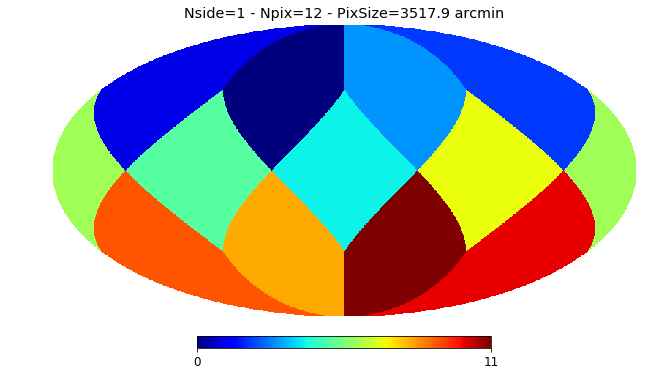

In [19]:
nside = 1
map = np.arange(12*nside**2)
hp.mollview(map, 
            title='Nside={0:} - Npix={1:} - PixSize={2:5.1f} arcmin'.format(nside, 
                                  12*nside**2,hp.nside2resol(nside, arcmin=True)))

Let's generate a map from its power spectrum with only one non-zero $\ell$ in order to see how scales on the sky relate to $\ell$ values. 

/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


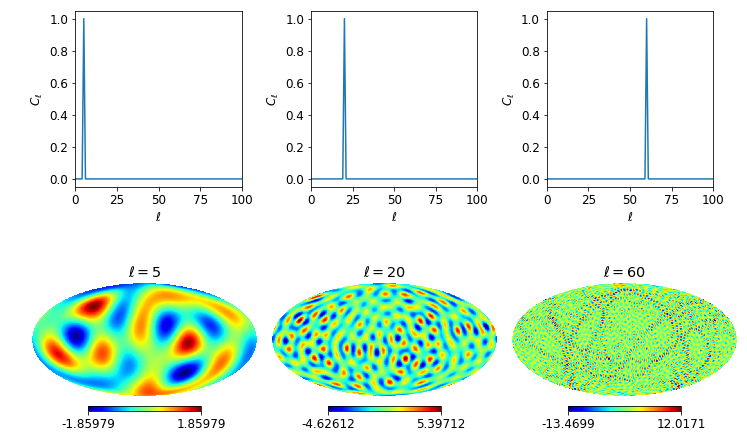

In [32]:
rc('figure',figsize=(10,6))
nside = 128
non_zero_ell = [5, 20, 60]

for i in range(len(non_zero_ell)):
  cell = np.zeros(3*nside)
  cell[non_zero_ell[i]] = 1.
  subplot(2,3,i+1)
  plot(cell)
  xlim(0,100)
  xlabel('$\ell$')
  ylabel('$C_\ell$')
  themap = hp.synfast(cell, nside)
  hp.mollview(themap, sub=(2,3,i+4), title='$\ell={}$'.format(non_zero_ell[i]))
  tight_layout()